In [35]:
from src import preprocessing as prep
from src import feature_engineering as fe
import cv2
import numpy as np
import matplotlib.pyplot as plt

### **Extract Data**

In [69]:
# Đặt thông số
video_dir = r"data\videos"  # Thư mục chứa video
output_dir = r"data\pictures"  # Thư mục lưu ảnh
fps = 30  # Tốc độ khung hình (30 FPS)
duration = 15  # Thời gian giới hạn (15 giây)

In [3]:
prep_data = prep.Processing_Img(video_dir, output_dir, fps, duration)
prep_data.video_to_frames()

Đang xử lý video data\videos\11222333.MOV (FPS gốc: 29.99771706871623)
Đã trích xuất 451 khung hình từ data\videos\11222333.MOV, lưu tại data\pictures\11222333
Đang xử lý video data\videos\11225430.MOV (FPS gốc: 29.997619236568525)
Đã trích xuất 451 khung hình từ data\videos\11225430.MOV, lưu tại data\pictures\11225430
Đang xử lý video data\videos\11226754.MOV (FPS gốc: 29.997674598868304)
Đã trích xuất 451 khung hình từ data\videos\11226754.MOV, lưu tại data\pictures\11226754
Đang xử lý video data\videos\11226767.MOV (FPS gốc: 29.99777464579779)
Đã trích xuất 451 khung hình từ data\videos\11226767.MOV, lưu tại data\pictures\11226767
Đang xử lý video data\videos\11226938.MOV (FPS gốc: 29.9975963464466)
Đã trích xuất 451 khung hình từ data\videos\11226938.MOV, lưu tại data\pictures\11226938
Hoàn tất xử lý tất cả video.


### **Transform Data**

In [2]:
vector_db_path = r"data\vector_embedding"  # Thư mục lưu embedding
images_path = r"data\pictures"  # Thư mục chứa ảnh đã xử lý

embedding = fe.FaceEmbedding(vector_db_path, images_path)
embedding.embedding_train_data()

1/1 [==============================] - 0s 43ms/step
[INFO] Saved 412 embeddings for student 11222333.
1/1 [==============================] - 0s 42ms/step
[INFO] Saved 445 embeddings for student 11225430.
1/1 [==============================] - 0s 49ms/step
[INFO] Saved 424 embeddings for student 11226754.
1/1 [==============================] - 0s 50ms/step
[INFO] Saved 336 embeddings for student 11226767.
1/1 [==============================] - 0s 46ms/step
[INFO] Saved 441 embeddings for student 11226938.


## **Modeling**

In [3]:
import numpy as np
import pandas as pd
import os

# Load .npy files
npy_files = [f"{vector_db_path}/{file}" for file in os.listdir(vector_db_path) if file.endswith('.npy')]

# Combine all .npy files into a single DataFrame
dataframes = []
for file in npy_files:
    df = pd.DataFrame(np.load(file))
    df['target'] = os.path.basename(file).replace('.npy', '')  # Remove the ".npy" extension
    dataframes.append(df)

data = pd.concat(dataframes, ignore_index=True)

In [4]:
data

,0,1,2,3,4,5,6,7,8,9,...,503,504,505,506,507,508,509,510,511,target
0,0.100009,-0.004601,-0.027598,0.011130,0.017113,0.018920,-0.041210,0.015866,-0.005589,0.004004,...,-0.040112,-0.035696,0.049030,0.017708,-0.016323,-0.049007,-0.058702,-0.045333,0.011858,11222333
1,0.094412,0.002332,-0.016921,0.012178,0.030634,-0.004959,-0.029663,0.016297,0.006096,0.004576,...,-0.037443,-0.028938,0.061193,0.014471,-0.009841,-0.044458,-0.062660,-0.054995,0.008785,11222333
2,0.006009,-0.040851,0.004395,0.061090,0.004764,0.015981,-0.096623,0.037166,-0.015567,-0.017565,...,0.079977,-0.057157,-0.012594,0.019547,-0.003944,0.041473,0.001631,-0.025436,-0.055528,11222333
3,-0.020137,-0.035509,-0.004847,0.071649,0.028110,-0.001899,-0.085285,0.039983,-0.010177,-0.005080,...,0.093691,-0.047866,0.028201,0.026739,-0.001983,0.033549,-0.010953,-0.008267,-0.076591,11222333
4,-0.028340,-0.029128,0.043641,0.071785,0.023813,-0.034677,-0.102401,0.015115,0.010794,-0.005157,...,0.079398,-0.028334,-0.019000,0.005665,-0.035316,0.022048,0.010170,0.005982,-0.065969,11222333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2053,0.038541,0.046878,0.003794,0.083867,0.051692,-0.019201,-0.001991,0.003147,-0.059906,0.035296,...,-0.036502,-0.073267,0.025647,0.001019,-0.014493,0.022841,-0.037483,-0.005897,-0.016779,11226938
2054,0.034422,0.035503,0.007603,0.079312,0.056341,-0.011474,0.003120,-0.008133,-0.059757,0.039340,...,-0.030720,-0.069381,0.022100,-0.003280,-0.015970,0.017909,-0.044320,-0.009750,-0.019242,11226938
2055,0.032831,0.032946,0.009583,0.092348,0.058183,0.001550,0.001012,-0.002637,-0.060632,0.051267,...,-0.026663,-0.077801,0.021449,-0.001535,-0.014637,0.031883,-0.047661,-0.017268,-0.013564,11226938
2056,0.026958,0.035543,0.006981,0.085678,0.061265,-0.003520,0.003156,-0.003949,-0.052901,0.051402,...,-0.027037,-0.071346,0.023212,-0.008196,-0.011431,0.032457,-0.051423,-0.019581,-0.013435,11226938


In [6]:
# Lưu file dataframe
data.to_csv("data/embedding.csv", index=False)

# **Modeling**

In [8]:
data = pd.read_csv("data/embedding.csv")
data.head()

,0,1,2,3,4,5,6,7,8,9,...,503,504,505,506,507,508,509,510,511,target
0,0.100009,-0.004601,-0.027598,0.011130,0.017113,0.018920,-0.041210,0.015866,-0.005589,0.004004,...,-0.040112,-0.035696,0.049030,0.017708,-0.016323,-0.049007,-0.058702,-0.045333,0.011858,11222333
1,0.094412,0.002332,-0.016921,0.012178,0.030634,-0.004959,-0.029663,0.016297,0.006096,0.004576,...,-0.037443,-0.028938,0.061193,0.014471,-0.009841,-0.044458,-0.062660,-0.054995,0.008785,11222333
2,0.006009,-0.040851,0.004395,0.061090,0.004764,0.015981,-0.096623,0.037166,-0.015567,-0.017565,...,0.079977,-0.057157,-0.012594,0.019547,-0.003944,0.041473,0.001631,-0.025436,-0.055528,11222333
3,-0.020137,-0.035509,-0.004847,0.071649,0.028110,-0.001899,-0.085285,0.039983,-0.010177,-0.005080,...,0.093691,-0.047866,0.028201,0.026739,-0.001983,0.033549,-0.010953,-0.008267,-0.076591,11222333
4,-0.028340,-0.029128,0.043641,0.071785,0.023813,-0.034677,-0.102401,0.015115,0.010794,-0.005157,...,0.079398,-0.028334,-0.019000,0.005665,-0.035316,0.022048,0.010170,0.005982,-0.065969,11222333


In [5]:
from sklearn.model_selection import train_test_split

# Split data into features (X) and target (y)
X = data.drop(columns=['target'])
y = data['target']

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Print the shapes of the resulting datasets
print(f"X_train shape: {X_train.shape}, X_test shape: {X_test.shape}")
print(f"y_train shape: {y_train.shape}, y_test shape: {y_test.shape}")

X_train shape: (1646, 512), X_test shape: (412, 512)
y_train shape: (1646,), y_test shape: (412,)


In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# Define the parameter grid
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Initialize the Random Forest model
rf_model = RandomForestClassifier(random_state=42)

# Perform Grid Search
grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=5, scoring='accuracy', verbose=2, n_jobs=-1)
grid_search.fit(X_train, y_train)

# Best parameters and best score
print(f"Best Parameters: {grid_search.best_params_}")
print(f"Best Accuracy: {grid_search.best_score_:.2f}")

# Use the best model to make predictions
best_rf_model = grid_search.best_estimator_
y_pred = best_rf_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Test Accuracy: {accuracy:.2f}")
print("Classification Report:")
print(classification_report(y_test, y_pred))

In [12]:
import pickle
# Load the model
with open('models/random_forest_model.pkl', 'rb') as file:
    model = pickle.load(file)

In [16]:
from sklearn.metrics import accuracy_score, classification_report
# Use the best model to make predictions
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Test Accuracy: {accuracy:.2f}")

Test Accuracy: 0.00


c:\Users\pv\anaconda3\envs\face_env\lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [17]:
y_pred

array([11226767, 11225430, 11226767, 11226754, 11222333, 11226754,
       11225430, 11225430, 11226938, 11225430, 11226754, 11225430,
       11225430, 11222333, 11225430, 11225430, 11222333, 11226754,
       11222333, 11226767, 11222333, 11226754, 11225430, 11226938,
       11226938, 11225430, 11226754, 11226754, 11226754, 11226754,
       11226754, 11226767, 11226754, 11226767, 11226754, 11226938,
       11226938, 11222333, 11226938, 11225430, 11226938, 11226767,
       11226767, 11222333, 11222333, 11225430, 11222333, 11226938,
       11226767, 11226767, 11222333, 11225430, 11226767, 11225430,
       11222333, 11222333, 11226767, 11226767, 11225430, 11226767,
       11225430, 11226767, 11225430, 11226767, 11226767, 11226767,
       11225430, 11226767, 11226767, 11226767, 11222333, 11222333,
       11226938, 11226767, 11225430, 11226938, 11226938, 11225430,
       11226938, 11226767, 11226938, 11225430, 11225430, 11222333,
       11226938, 11222333, 11222333, 11226754, 11222333, 11226

In [27]:
y_test = y_test.astype("int64")

In [29]:
def calculate_difference_percentage(y_test, y_pred):
    """
    Tính phần trăm khác nhau giữa các phần tử của hai mảng.

    Args:
        y_test (array-like): Mảng giá trị thực tế.
        y_pred (array-like): Mảng giá trị dự đoán.

    Returns:
        float: Phần trăm khác nhau giữa hai mảng.
    """
    if len(y_test) != len(y_pred):
        raise ValueError("Hai mảng phải có cùng độ dài.")
    
    differences = sum(y_test != y_pred)
    percentage_difference = (differences / len(y_test)) * 100
    return percentage_difference

# Sử dụng hàm
difference_percentage = calculate_difference_percentage(y_test, y_pred)
print(f"Phần trăm khác nhau: {difference_percentage:.2f}%")

Phần trăm khác nhau: 0.49%


In [28]:
sum(y_test != y_pred)

2

In [31]:
import cv2
import os

# Đường dẫn đến thư mục chứa ảnh
test_folder = r"data\test"

# Liệt kê tất cả các tệp trong thư mục
image_files = [file for file in os.listdir(test_folder) if file.lower().endswith(('.png', '.jpg', '.jpeg'))]
emb_data = []

# Mở và hiển thị từng ảnh
for image_file in image_files:
    image_path = os.path.join(test_folder, image_file)
    image = cv2.imread(image_path)  # Đọc ảnh  # Tính toán embedding
    emb_data.append(embedding.embedding_face(image))  # Lưu embedding vào danh sách

1/1 [==============================] - 0s 79ms/step


In [34]:
# Dự đoán xác suất cho từng mẫu trong emb_data
probabilities = model.predict_proba(emb_data)

# In kết quả dự đoán xác suất
print("Xác suất dự đoán:")
for i, prob in enumerate(probabilities):
    print(f"Mẫu {i + 1}: {prob}")

Xác suất dự đoán:
Mẫu 1: [0.46666667 0.18055556 0.14555556 0.19222222 0.015     ]
Mẫu 2: [0.19888889 0.38722222 0.16611111 0.18333333 0.06444444]
Mẫu 3: [0.905      0.02611111 0.02222222 0.03333333 0.01333333]


c:\Users\pv\anaconda3\envs\face_env\lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


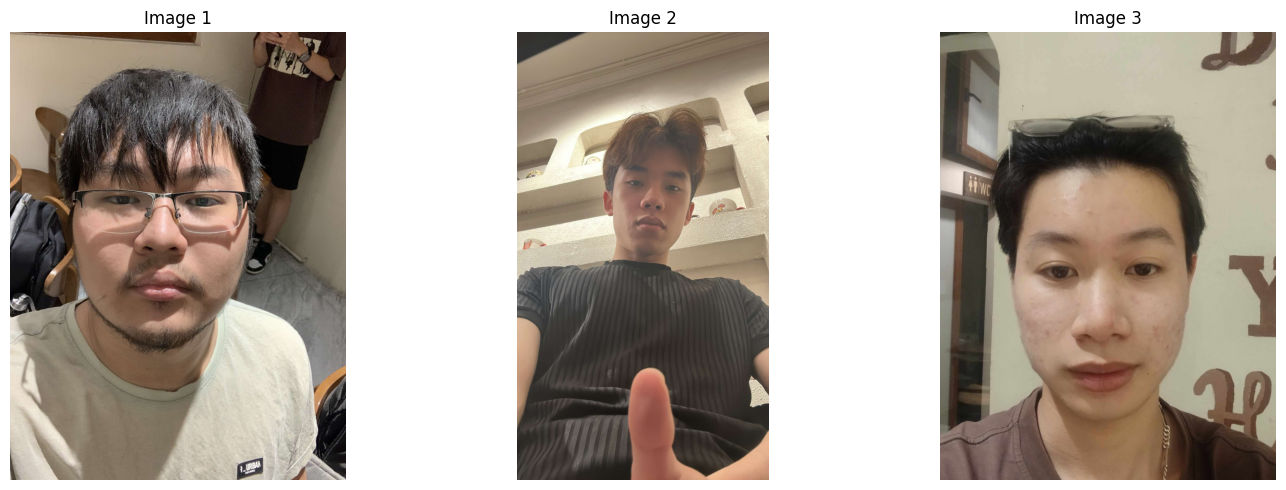

In [36]:
def visualize_images(image_paths, titles, ax):
    """
    Hiển thị ảnh trên các trục (axes).

    Args:
        image_paths (list): Danh sách đường dẫn đến các ảnh.
        titles (list): Danh sách tiêu đề tương ứng với các ảnh.
        ax (matplotlib.axes._subplots.AxesSubplot): Trục để hiển thị ảnh.
    """
    for i, image_path in enumerate(image_paths):
        image = cv2.imread(image_path)
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  # Chuyển đổi sang RGB
        ax[i].imshow(image)
        ax[i].set_title(titles[i])
        ax[i].axis('off')

# Danh sách ảnh và tiêu đề
image_paths = [os.path.join(test_folder, file) for file in image_files]
titles = [f"Image {i+1}" for i in range(len(image_files))]

# Tạo lưới subplots
fig, axes = plt.subplots(1, len(image_paths), figsize=(15, 5))

# Hiển thị ảnh
visualize_images(image_paths, titles, axes)

plt.tight_layout()
plt.show()